<a href="https://colab.research.google.com/github/diwaskunwar10/text_ocr_nep/blob/main/text_on_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr -q

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [ ]:
#using easyocr for nepali language ne
reader = easyocr.Reader(['ne'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):

    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



In [ ]:
#load the image
loc="aa.jpg"

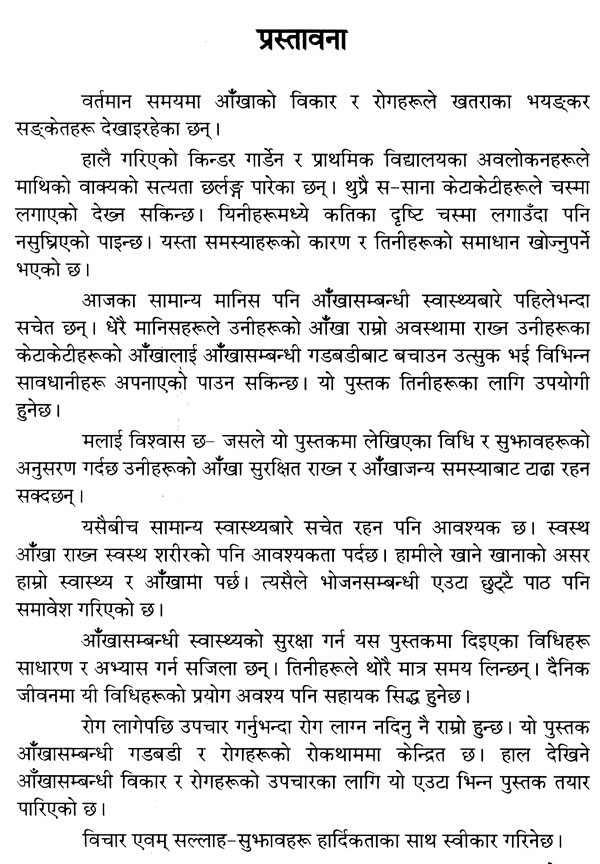

In [ ]:
#display the image
Image(loc)

In [ ]:
img = cv2.imread(loc)
image = scan_effect(img)
#from google.colab.patches import cv2_imshow
#cv2_imshow(image)
filename = 'scanned.jpg'
cv2.imwrite(filename, image)

True

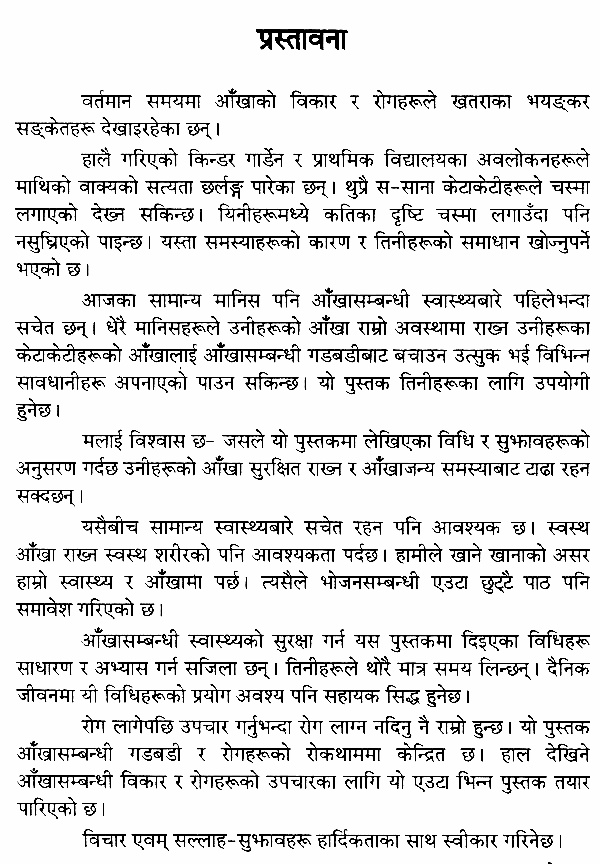

In [ ]:
path=filename

Image(path)

In [ ]:
output = reader.readtext(path)
output

[([[254, 26], [354, 26], [354, 56], [254, 56]],
  'प्रस्तावना',
  0.7075519810608131),
 ([[79, 91], [133, 91], [133, 111], [79, 111]], 'चत्तमान', 0.6098662058222656),
 ([[143, 91], [203, 91], [203, 111], [143, 111]], 'समयम', 0.9998305439949036),
 ([[212, 86], [340, 86], [340, 112], [212, 112]],
  'औंखको   विकार',
  0.4425099023885739),
 ([[369, 85], [440, 85], [440, 115], [369, 115]],
  'रोगहरूले',
  0.7586335944104672),
 ([[449, 91], [515, 91], [515, 111], [449, 111]], 'खतराक', 0.6714422878678828),
 ([[525, 93], [591, 93], [591, 113], [525, 113]], 'भयडका', 0.5976258235916242),
 ([[12, 113], [224, 113], [224, 142], [12, 142]],
  'सङ्केतहरू देखाइरहेका छन्।',
  0.41209519269851563),
 ([[78, 144], [286, 144], [286, 172], [78, 172]],
  'हालै गरिएको किन्डर गार्डेन',
  0.5321054121938741),
 ([[307, 144], [592, 144], [592, 174], [307, 174]],
  'प्राथमिक विद्यालयका अवलोकनहरूले',
  0.5006717316106427),
 ([[12, 172], [546, 172], [546, 204], [12, 204]],
  'माथिको वाक्यको सत्यता छर्लङ्ग पारेका छन्

In [ ]:
print(f'Total detection length',len(output))

Total detection length 73


प्रस्तावना
चत्तमान
समयम
औंखको   विकार
रोगहरूले
खतराक
भयडका
सङ्केतहरू देखाइरहेका छन्।
हालै गरिएको किन्डर गार्डेन
प्राथमिक विद्यालयका अवलोकनहरूले
माथिको वाक्यको सत्यता छर्लङ्ग पारेका छन्। थुप्रै स-्साना केटाकेटोहरूले
चम
लगाएको
देख्न
सकिन्छ
यिनीहरूमध्ये
कतिका   दृष्टि
चस्मा
लगाउंदा
नसुघ्रिएको पाइन्छ
यस्त
समस्याहरूको
करण
तिनीहरूको समाधान खोज्नुपर्ने
भएको छ
आजका
सामन्य
मानिस
आंखासम्बन्धी स्वास्थ्यबारे पहिलेभन्दा
सचेत छन्। धेरै मानिसहरूले उनीहरूको आंखा राम्रो अवस्थामा राख्न उनीहरूका
केटाकेटोहरूको आंखालाई आंखासम्बन्धी गडबडीबाट बचाउन उत्सुक भई विभिन्न
सावधानीहरू अपनाएको पाउन सकिन्छ
यो पुस्तक तिनोहरूका लागि उपयोगी
हुनछ।
मलाई विश्वास छ- जसले यो पुस्तकमा लेखिएका विधि र सुझावहरूको
अनुसरण गर्दछ उनीहरूको आंखा
राख्न
आखाजन्य समस्याबाट यढा रहन
सक्दछन्
यसैबीच
सामान्य स्वास्थ्यबारे सचेत रहन पनि आवश्यक
छ |
स्वस्थ
आंखा राख्न स्वस्थ शरीरको पनि आवश्यकता पर्दछ
हामोले खाने खानाको असर
हान्रो
स्वास्थ्य
आंखामा
पछ
त्यसैले
भोजनसम्बन्धी
एउटा   छुटटे पठ
समावेश गरिएको छ।
आंखासम्बन्धी स्वास्थ्यको सुरक्षा गर्न यस पुस्तक

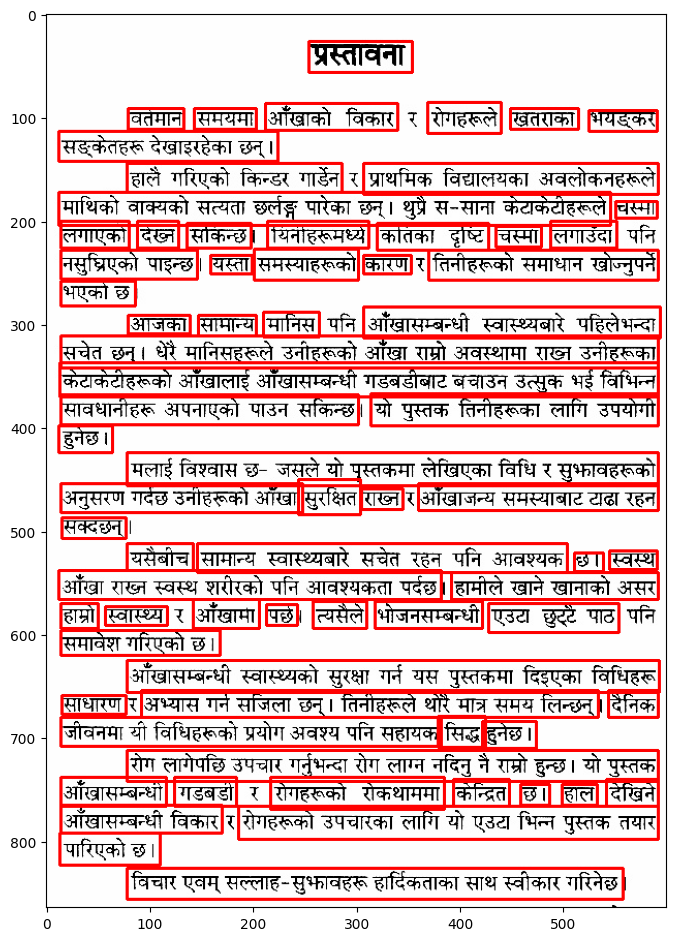

In [ ]:
image = cv2.imread(path)
for i in range(len(output)):
  cord = output[i][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
  print(output[i][1])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))